<a href="https://colab.research.google.com/github/managonzalezgav/modeladoysimulacion/blob/master/Copy_of_SolucionNumerica(EC_LOGIST).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Solución de Problemas de Valor Inicial

Encuentre una aproximación a $x{(t)}$, dado:

$\dot x = f{(t, x)}$


$x{(t)}_{(t=0)} = x_0$


In [0]:
import matplotlib.style
matplotlib.style.use('classic')
import numpy as np
from matplotlib import pyplot as plt
from math import sin
import numpy as np

In [0]:
%matplotlib inline

## Método de Euler

<span style="color:red"> **Es un método iterativo que a partir de un valor inicial emplea la derivada para conocer la pendiente de la recta tangente en ese punto, para luego trazar una recta hasta el siguente valor con un incremento h.** </span>

$x_{i+1} = x_{i} + hf_{(t_i, x_i)}$

In [0]:
def euler( f, h, tini, tfin, x0, r, K ):
    ti = tini  
    xi = x0
  
    x = list()
    t = list()
  
    while ( ti < tfin ):
    
      x.append (xi)
      t.append (ti)
  
      xi = xi + h*f(ti,xi,r,K)
      ti = ti + h
    return t, x    

## Método de Runge-Kutta de Cuarto Orden

<span style="color:red"> ** Es un método iterativo para la aproximación de soluciones de ecuaciones diferenciales ordinarias.** </span>

$k_1 = f_{(t_i, x_i)}$

$k_2 = f_{(t_i + \frac{h}{2}, x_i + \frac{k_1}{2})}$

$k_3 = f_{(t_i + \frac{h}{2}, x_i + \frac{k_2}{2})}$

$k_4 = f_{(t_i + h, x_i + k_3)}$


$x_{i+1} = x_i + \frac{h}{6}(k_1 + k_2 + k_3 + k_4)$

In [0]:
def rk4( f, h, tini, tfin, x0, r, K ):
    ti = tini  
    xi = x0
  
    x = list()
    t = list()
  
    while ( ti < tfin ):

      x.append (xi)
      t.append (ti)
      k1 = f( ti,xi,r,K)
      k2 = f( ti + 0.5*h,xi + 0.5*k1*h,r,K )
      k3 = f( ti + 0.5*h,xi + 0.5*k2*h,r,K)
      k4 = f( ti + h,xi + k3*h,r,K) 

      xi = xi + h*(k1 + 2*k2 + 2*k3 + k4)/6
      ti = ti + h
    return t, x

## <span style="color:red"> Ex 1.</span> Comparación de métodos  

Dada la ecuación diferencial:

$\dot x = ax$

Siendo $a \in \Re$ una constante cualquiera. Grafique la solución analítica y las aproximaciones numéricas obtenidas con el método de Euler y con el método RK4.

Varíe el paso de integración $h$ a fin de observar cómo varía la precisión de los resultados numéricos a medida que éste se hace más pequeño.

In [0]:
def sistema_1(t, x, r, K):
    #x_dot = sin(x)
    #x_dot = a*x
    x_dot = r*x*(1-(x/K))
    return x_dot



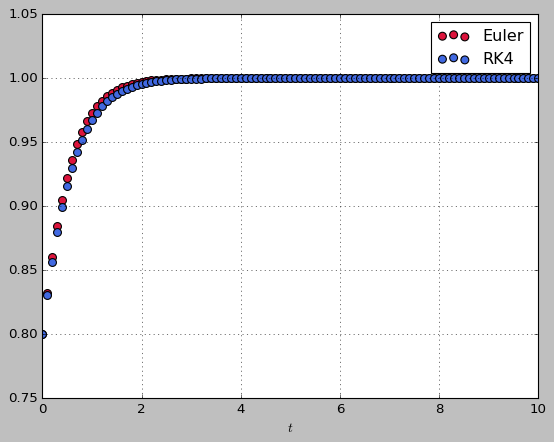

In [0]:
a = -1
h = 0.1
tini = 0
tfin = 10
x0 = 0.8
r= 2
K= 1


t = np.linspace(0,10,1001) 
#x = x0*np.exp(a*t)

t1,x1 = euler( sistema_1, h, tini, tfin, x0, r, K)
t2,x2 = rk4( sistema_1, h, tini, tfin, x0, r, K )



plt.figure()
# gráfica de analítica:
#plt.plot(  t, x, 'black', label = 'Analytical', linewidth = 2)
# gráfica de euler:
plt.scatter( t1, x1, c = 'crimson', label = 'Euler', s = 50)
# gráfica de rk4:
plt.scatter( t2, x2, c = 'royalblue', label = 'RK4', s = 50)

#x0 = 4
#t1,x1 = euler( sistema_1, h, tini, tfin, x0, r, K )
#plt.scatter( t1, x1, c = 'crimson', label = 'Euler', s = 50)

plt.xlim([0, tfin])
#plt.ylim([-3.14, 6.28])
plt.xlabel(r'$t$')
plt.grid()
plt.legend(loc = 'best')
plt.show()